# Data description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

---

# Data Exploring / Feature Engineerin / EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.shape

(21613, 21)

In [9]:
df2 = df.copy()
df2.drop_duplicates(inplace=True)

In [10]:
df2.shape

(21613, 21)

In [11]:
df = df.drop(['id','date' ], axis=1)

---

# Check the data distribution !

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

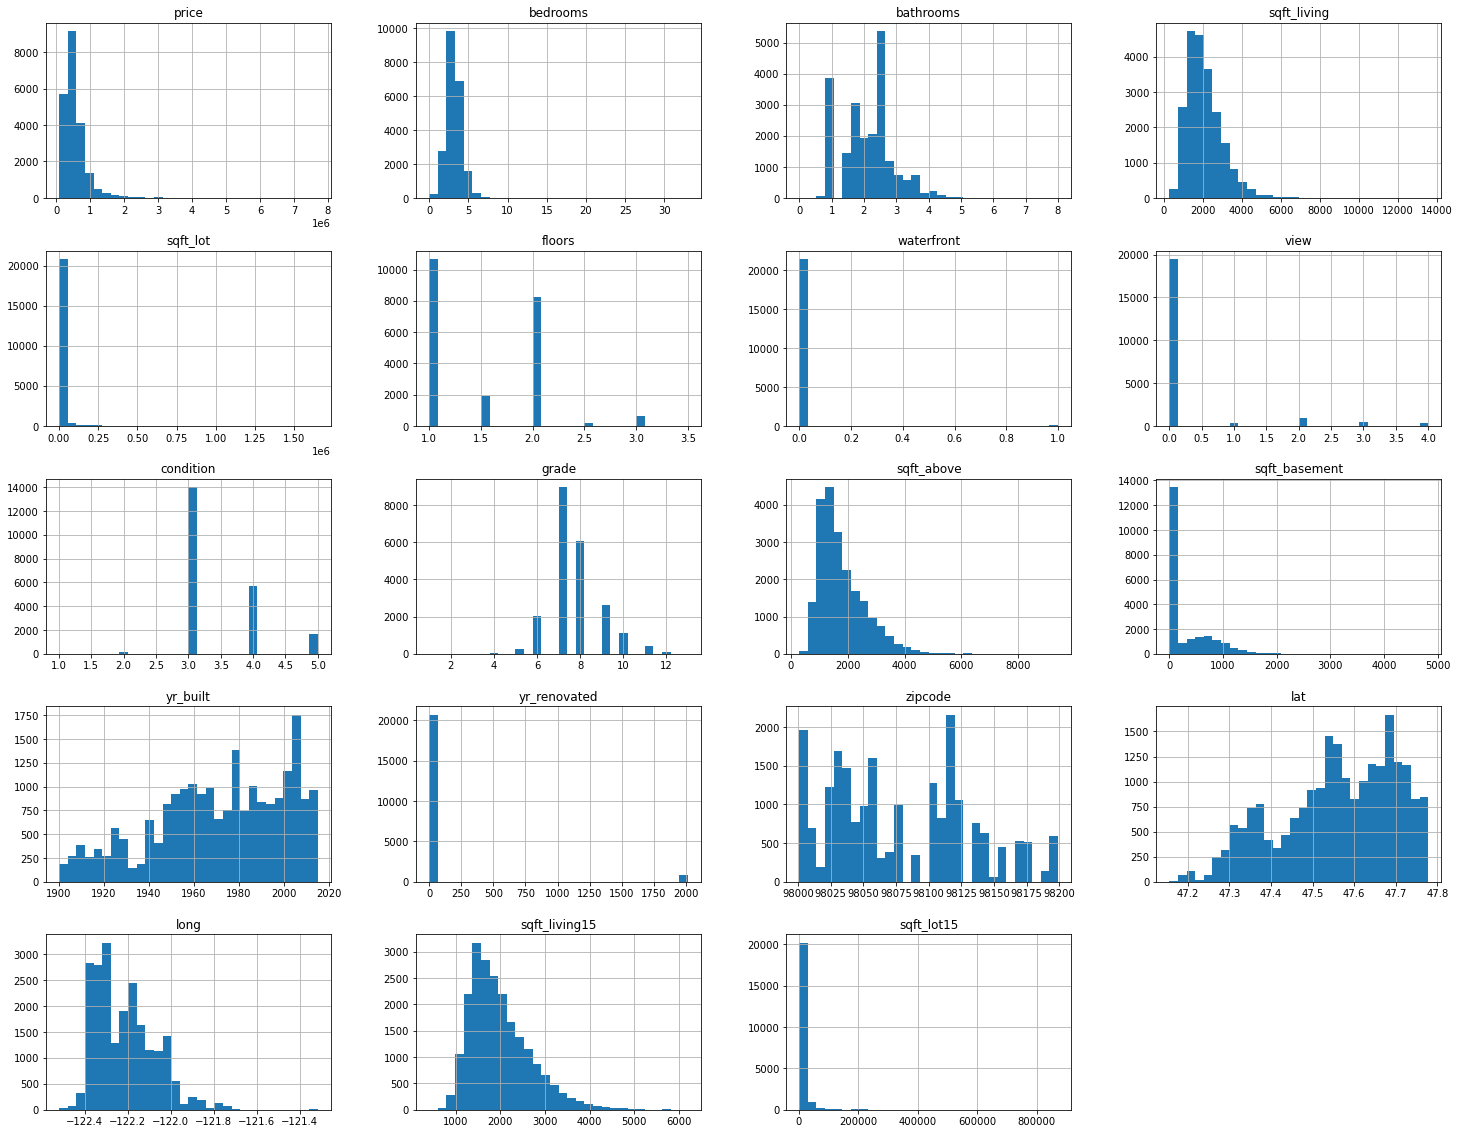

In [12]:
df.hist(figsize = (25,20), bins = 30)

---

# Check the correlation !

In [13]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

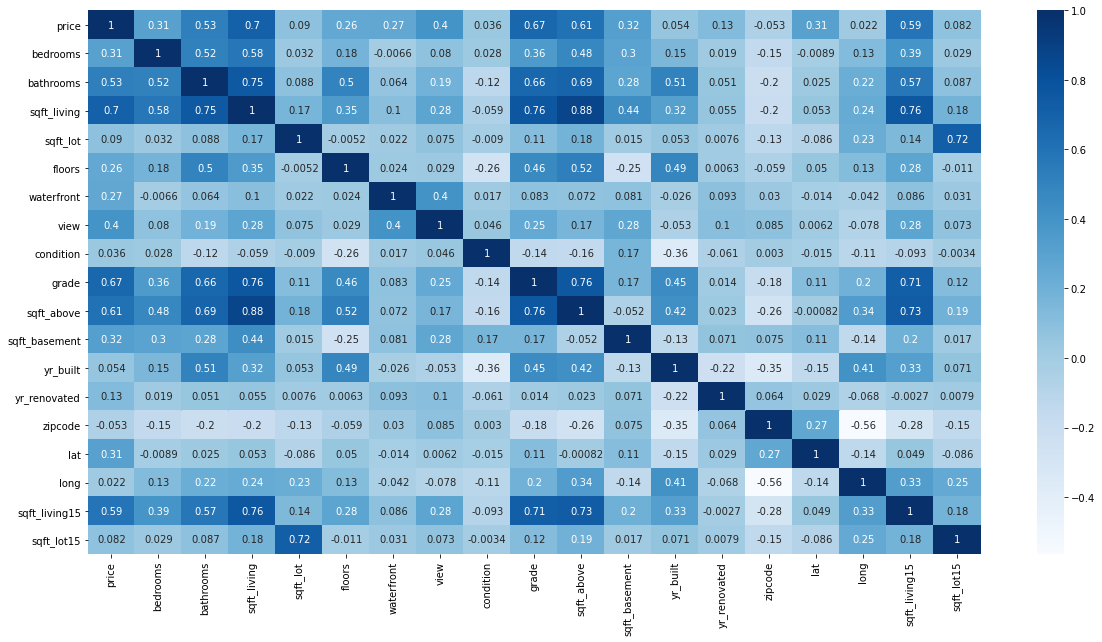

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

---

# Let's put the data on the map !

**I am using only 300 houses, because my computer is not so powerful machine :D**

In [15]:
df_ = df.sample(n=300)

In [16]:
df_.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20620,982000.0,4,2.75,3610,8580,2.0,0,0,3,9,3610,0,2014,0,98033,47.6706,-122.173,2360,8580
9088,220000.0,3,2.25,1400,7205,1.0,0,0,3,7,1140,260,1985,0,98030,47.3490,-122.166,1970,7252
7158,390000.0,4,2.00,1900,76877,1.0,0,0,3,8,1900,0,2004,0,98042,47.3491,-122.113,1740,34848
11258,379900.0,3,2.00,3110,44967,2.0,0,0,3,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967
14215,1285000.0,5,3.50,2980,5100,2.0,0,0,3,10,2370,610,2015,0,98115,47.6782,-122.299,1780,5100


In [17]:
df_.shape

(300, 19)

In [18]:
maps = folium.Map(location=[47.560053, -122.319], zoom_start=10)
for index, house in df_.iterrows():
    location = [house.loc['lat'],house.loc['long']]
    folium.Marker(location, popup = f'Year built:{house.loc["yr_built"]}\n Condition:{house.loc["condition"]}\n Bedroom(s):{house.loc["bedrooms"]}\nBathroom(s):{house.loc["bathrooms"]}\nPrice($):{house.loc["price"]}').add_to(maps)

In [19]:
maps

In [20]:
heatmap = folium.Map(location=[47.560053, -122.319], zoom_start =10)
heat_data = [[row['lat'],row['long']] for index, row in df_.iterrows()]
HeatMap(heat_data).add_to(heatmap)

In [21]:
heatmap

# Continue the visualization

---

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


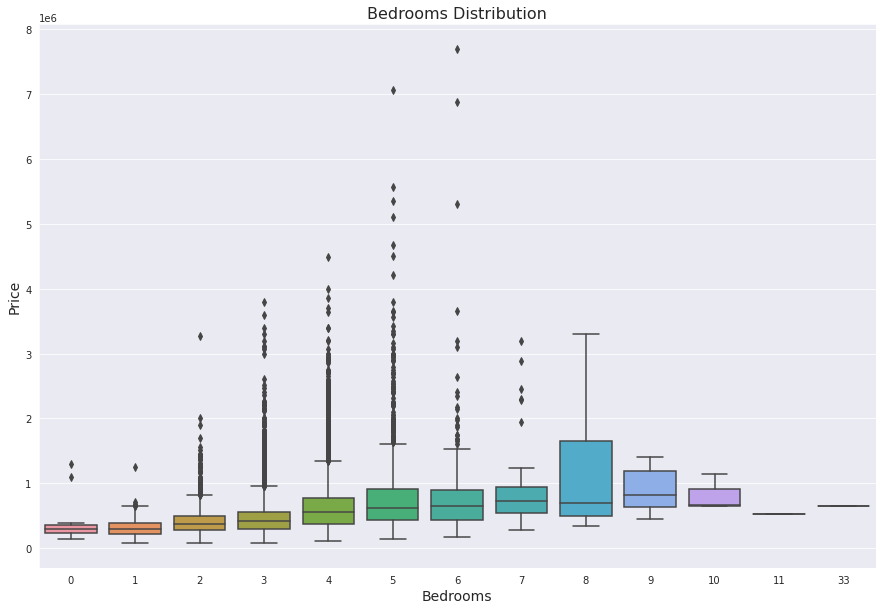

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
ax = sns.boxplot(data = df, x='bedrooms', y='price')
ax.set_title("Bedrooms Distribution", fontsize=16)
ax.set_xlabel("Bedrooms",size=14)
ax.set_ylabel("Price",size=14)
plt.show()

**There are lot of parts where we can find some outliers!**

In [24]:
df[df['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


**Lets drop! Maybe it is a mistake, because I have checked on google and it is not possible. This house is in the upper Seatle.**

In [25]:
i = df[df['bedrooms']==33].index
df.drop(i, inplace = True, axis =0)

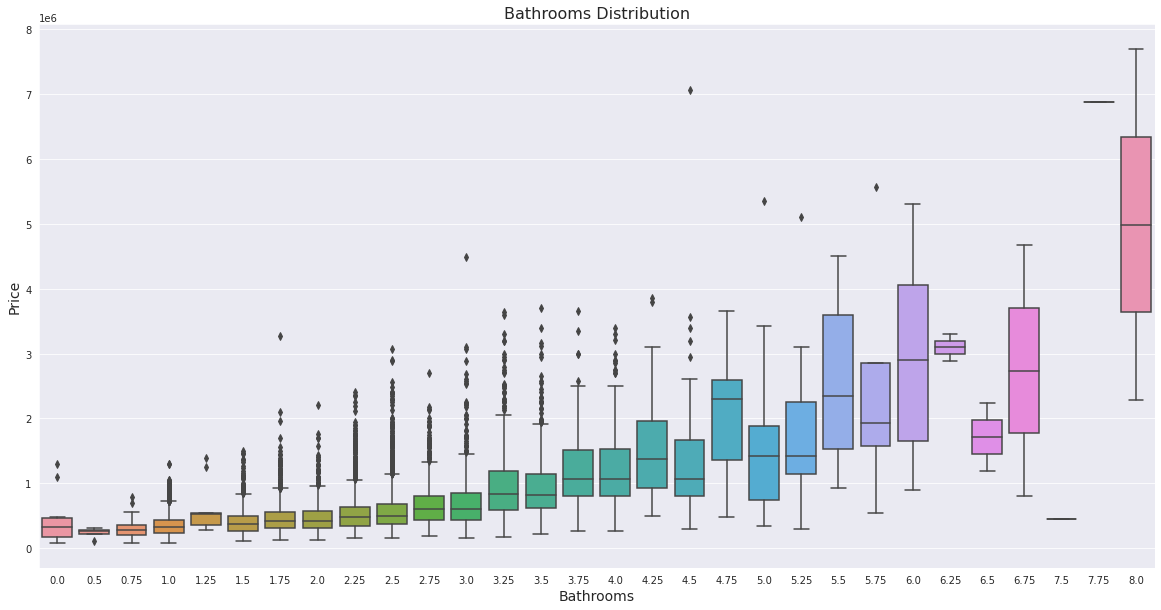

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = df, x='bathrooms', y='price')
ax.set_title("Bathrooms Distribution", fontsize=16)
ax.set_xlabel("Bathrooms",size=14)
ax.set_ylabel("Price",size=14)
plt.show()

**There are some anomalies on right side ! The line is not countinuesly increasing**

In [27]:
df[(df['bathrooms']>=7.5) & (df['bathrooms']<=7.75)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


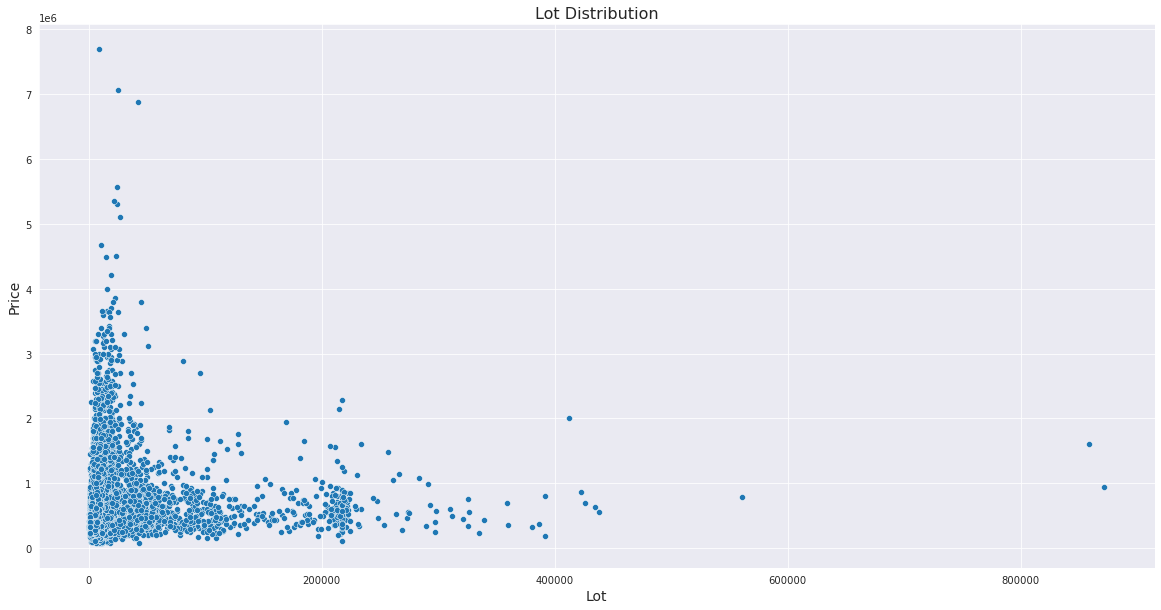

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data = df, x='sqft_lot15', y='price')
ax.set_title("Lot Distribution", fontsize=16)
ax.set_xlabel("Lot",size=14)
ax.set_ylabel("Price",size=14)
plt.show()

In [29]:
df[df['sqft_lot15']>500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,937500.0,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
13464,790000.0,3,2.5,2640,432036,1.5,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
20452,1600000.0,4,5.5,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132


**I have checked them on google. They are valid !**

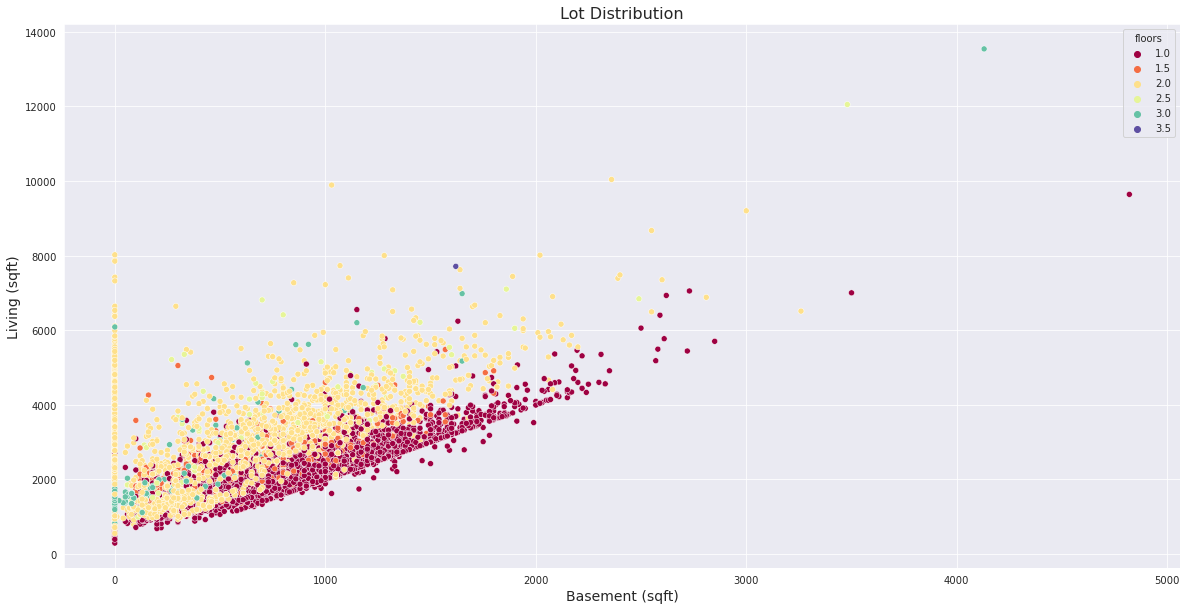

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data = df, x='sqft_basement', y='sqft_living', hue='floors',palette = 'Spectral')
ax.set_title("Lot Distribution", fontsize=16)
ax.set_xlabel("Basement (sqft)",size=14)
ax.set_ylabel("Living (sqft)",size=14)
plt.show()

In [31]:
df[(df['sqft_basement']>df['sqft_living']) & df['floors']==1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


**I would have liked to check that, maybe there is house, where the basement is bigger than the living area and the floor equals 1 !**

In [32]:
df[df['price']>7000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


## Okay, Firstly the data frame looks good, so we can start the Machine Learning section 

---

# Machine Learning

## Train test split

In [33]:
X=df.drop(['price'], axis = 1) 
y=df['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

## Data standardization

In [36]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

## Linear Regression

In [37]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train_s, y_train)

LinearRegression()

In [40]:
pred_lr_s = lr.predict(X_test_s)

In [41]:
lr_r2 = r2_score(y_test, pred_lr_s)

In [42]:
lr_r2

0.7032139700875917

In [43]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr_s)))

RMSE: 196598.94299499437


In [44]:
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_lr_s))

## Linear Regression + Polynomial

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf = PolynomialFeatures(degree=2)

In [47]:
X_train_pf = pf.fit_transform(X_train_s)
X_test_pf = pf.fit_transform(X_test_s)

In [48]:
lr_pf = LinearRegression()

In [49]:
lr_pf.fit(X_train_pf, y_train)

LinearRegression()

In [50]:
pred_lr_pf = lr_pf.predict(X_test_pf)

In [51]:
lr_pf_r2 = r2_score(y_test, pred_lr_pf)

In [52]:
lr_pf_r2

0.8167169482431509

In [53]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr_pf)))

RMSE: 154497.19720329536


In [54]:
lr_pf_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_lr_pf))

## Ridge Regression

In [55]:
from sklearn.linear_model import RidgeCV

In [56]:
alphas = np.linspace(0.001,100,1000)

In [57]:
ridgecv = RidgeCV(alphas=alphas,cv=None)

In [58]:
ridgecv.fit(X_train_s, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00, 1.90288288e+00,
       2.00298198e+00, 2.10308108e+0...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]))

In [59]:
pred_rcv=ridgecv.predict(X_test_s)

In [60]:
rcv_r2 = r2_score(y_test, pred_rcv)

In [61]:
rcv_r2

0.7032383079150346

In [62]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rcv)))

RMSE: 196590.8818183122


In [63]:
rcv_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_rcv))

## Lasso Regression

In [64]:
from sklearn.linear_model import LassoCV

In [65]:
alphas = np.linspace(0.001,100,1000)

In [66]:
lassocv = LassoCV(alphas=alphas,cv=None,max_iter=50000)

In [67]:
lassocv.fit(X_train_s, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00, 1.90288288e+00,
       2.00298198e+00, 2.10308108e+0...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]),
        max_iter=50000)

In [68]:
pred_lcv=lassocv.predict(X_test_s)

In [69]:
lcv_r2 = r2_score(y_test, pred_lcv)

In [70]:
lcv_r2

0.7032590662494645

In [71]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lcv)))

RMSE: 196584.00598031454


In [72]:
lcv_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_lcv))

## Ridge Regression + Polynomial

In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
alphas = np.linspace(0.001,100,1000)

In [75]:
ridgecv = RidgeCV(alphas=alphas,cv=None)

In [76]:
ridgecv.fit(X_train_pf, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00, 1.90288288e+00,
       2.00298198e+00, 2.10308108e+0...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]))

In [77]:
pred_rcv_pf=ridgecv.predict(X_test_pf)

In [78]:
rcv_r2_pf = r2_score(y_test, pred_rcv_pf)

In [79]:
rcv_r2_pf

0.817492993980964

In [80]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rcv_pf)))

RMSE: 154169.7690132889


In [81]:
rcv_rmse_pf = np.sqrt(metrics.mean_squared_error(y_test, pred_rcv_pf))

## Lasso Regression + Polynomial

In [82]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [83]:
alphas = np.linspace(0.001,100,1000)

In [84]:
lassocv = LassoCV(alphas=alphas,cv=None,max_iter=10000)

In [85]:
lassocv.fit(X_train_pf, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00, 1.90288288e+00,
       2.00298198e+00, 2.10308108e+0...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]),
        max_iter=10000)

In [86]:
pred_lcv_pf=lassocv.predict(X_test_pf)

In [87]:
lcv_r2_pf = r2_score(y_test, pred_lcv_pf)

In [88]:
lcv_r2_pf

0.8175361917189021

In [89]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lcv_pf)))

RMSE: 154151.52264689098


In [104]:
lcv_rmse_pf = np.sqrt(metrics.mean_squared_error(y_test, pred_lcv_pf))

## ElasticNet Regression + Polynomial

In [91]:
from sklearn.linear_model import ElasticNetCV

In [92]:
alphas = np.linspace(0.001,100,1000)

In [93]:
ratio = np.linspace(0.01,10,100)

In [94]:
elas = ElasticNetCV(alphas=alphas,l1_ratio=ratio, max_iter=10000)

In [95]:
elas.fit(X_train_s, y_train)

ElasticNetCV(alphas=array([1.00000000e-03, 1.01099099e-01, 2.01198198e-01, 3.01297297e-01,
       4.01396396e-01, 5.01495495e-01, 6.01594595e-01, 7.01693694e-01,
       8.01792793e-01, 9.01891892e-01, 1.00199099e+00, 1.10209009e+00,
       1.20218919e+00, 1.30228829e+00, 1.40238739e+00, 1.50248649e+00,
       1.60258559e+00, 1.70268468e+00, 1.80278378e+00, 1.90288288e+00,
       2.00298198e+00, 2.103081...
       9.76977207e+01, 9.77978198e+01, 9.78979189e+01, 9.79980180e+01,
       9.80981171e+01, 9.81982162e+01, 9.82983153e+01, 9.83984144e+01,
       9.84985135e+01, 9.85986126e+01, 9.86987117e+01, 9.87988108e+01,
       9.88989099e+01, 9.89990090e+01, 9.90991081e+01, 9.91992072e+01,
       9.92993063e+01, 9.93994054e+01, 9.94995045e+01, 9.95996036e+01,
       9.96997027e+01, 9.97998018e+01, 9.98999009e+01, 1.00000000e+02]))

In [96]:
pred_elas_pf =elas.predict(X_test_s)

In [97]:
elas_r2_pf = r2_score(y_test, pred_elas_pf)

In [98]:
elas_r2_pf

0.7017964283019766

In [100]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_elas_pf)))

RMSE: 197067.8923506487


In [106]:
elas_rmse_pf = np.sqrt(metrics.mean_squared_error(y_test, pred_elas_pf))

---

# Summary

In [170]:
r2_score = [lr_r2,lr_pf_r2,rcv_r2,lcv_r2,rcv_r2_pf,lcv_r2_pf,elas_r2_pf]
rmse_vals = [lr_rmse,lr_pf_rmse,rcv_rmse,lcv_rmse,rcv_rmse_pf,lcv_rmse_pf,elas_rmse_pf]

labels = ['Linear','Linear + Poly', 'Ridge', 'Lasso', 'Ridge + Poly', 'Lasso + Poly', 'ElasticNet + Poly']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
r2_df = pd.Series(r2_score , index=labels).to_frame()
r2_df.rename(columns={0: 'R2'}, inplace=1)

df_r2_rmse = pd.concat([rmse_df, r2_df], axis=1)

In [171]:
df_r2_rmse['R2']=df_r2_rmse['R2'].apply(lambda x : 100*x)
df_r2_rmse.sort_values(by="R2",ascending = False)

,RMSE,R2
Lasso + Poly,154151.522647,81.753619
Ridge + Poly,154169.769013,81.749299
Linear + Poly,154497.197203,81.671695
Lasso,197067.892351,70.325907
Ridge,196590.881818,70.323831
Linear,196598.942995,70.321397
ElasticNet + Poly,197067.892351,70.179643


Text(0.5, 1.0, 'ElasticNet Regression + Polynomial')

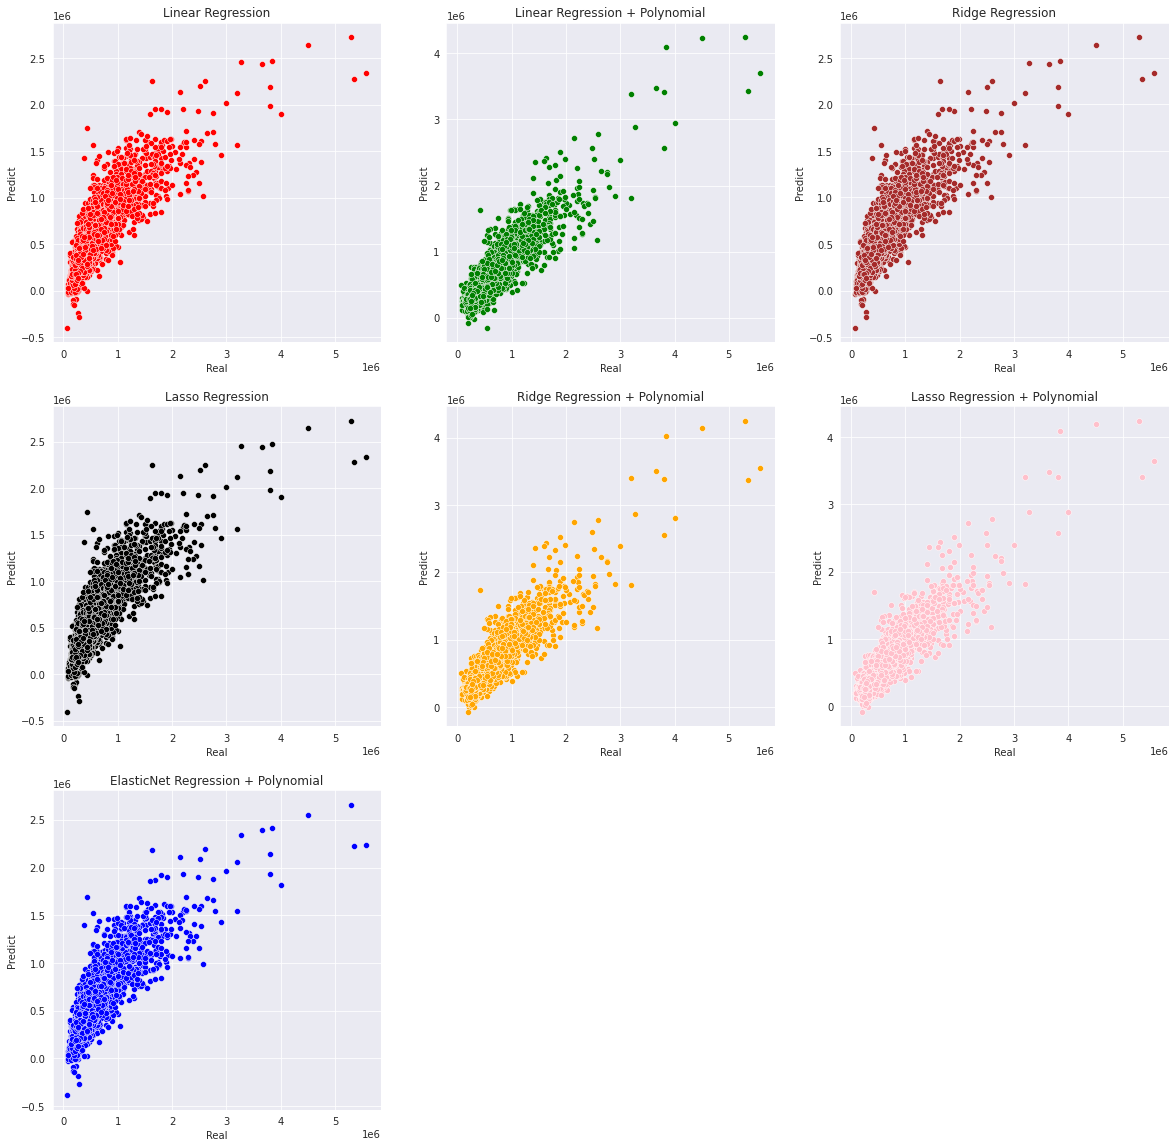

In [178]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.delaxes(ax= axes[2,1]) 
fig.delaxes(ax= axes[2,2]) 
sns.set_palette('dark')

sns.scatterplot(ax=axes[0, 0],x=y_test, y=pred_lr_s, color='red')
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predict')
axes[0, 0].set_title('Linear Regression')

sns.scatterplot(ax=axes[0, 1],x=y_test, y=pred_lr_pf,color='green')
axes[0, 1].set_xlabel('Real')
axes[0, 1].set_ylabel('Predict')
axes[0, 1].set_title('Linear Regression + Polynomial')

sns.scatterplot(ax=axes[0, 2],x=y_test, y=pred_rcv,color='brown')
axes[0, 2].set_xlabel('Real')
axes[0, 2].set_ylabel('Predict')
axes[0, 2].set_title('Ridge Regression')

sns.scatterplot(ax=axes[1, 0],x=y_test, y=pred_lcv,color='black')
axes[1, 0].set_xlabel('Real')
axes[1, 0].set_ylabel('Predict')
axes[1, 0].set_title('Lasso Regression')

sns.scatterplot(ax=axes[1, 1],x=y_test, y=pred_rcv_pf,color='orange')
axes[1, 1].set_xlabel('Real')
axes[1, 1].set_ylabel('Predict')
axes[1, 1].set_title('Ridge Regression + Polynomial')

sns.scatterplot(ax=axes[1, 2],x=y_test, y=pred_lcv_pf,color='pink')
axes[1, 2].set_xlabel('Real')
axes[1, 2].set_ylabel('Predict')
axes[1, 2].set_title('Lasso Regression + Polynomial')

sns.scatterplot(ax=axes[2, 0],x=y_test, y=pred_elas_pf,color='blue')
axes[2, 0].set_xlabel('Real')
axes[2, 0].set_ylabel('Predict')
axes[2, 0].set_title('ElasticNet Regression + Polynomial')

---

# Conlusion

**Data Preparation:
Firstly, I have examined the datasat to find anomalies. After that I have deleted a the duplicates and the outliers and I have checked the Na values. Underway, I have created some plots to help me to understand betted the data set. Unfortunately, When I arrived the "Put the data on the map" setion, I could visualize only 400 pcs because my computer has not enough power to visualize more than 21,000 rows. When I finished the Feature engineering part, I started to prepare the data for the machine learning section. The first step was to split the data to train and test sides. The parameter's ratio is 30% for testing and 70% for training. So the next was the scaling, I have done it with help of MinMaxscaler function. As you can see I have coded 7 differnt Regression models.**

**Final Conclusion:
Based on the Accuracy (R2) score, the RMSE (Root-mean-square-error) and the graph, I am recommending the Lasso + Poly or Ridge + Poly models for the usage. Them Accuracy score are not far away from each other.**

**For the Future:
There are some possibilities to fine tune the hyperparameters. For example: find the best 'degree' parameter in case of PolynomialFeature or create a GridSearch for this action, moreover create a complete pipline, what contains the scaling, model and so on.**